# Importando Bibliotecas e definindo funções

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

Definição de funções:

In [9]:
def plot_dados(data_1, data_2):

    plt.xlabel("Dimensão 1")
    plt.ylabel("Dimensão 2")

    plt.scatter(data_1[:, 0], data_1[:, 1], color='red', label='Data_1')
    plt.scatter(data_2[:, 0], data_2[:, 1], color='blue', label='Data_2')

    plt.grid(True)
    plt.legend()

    plt.show()


def preproces(data_1, data_2, num_dados, test_size):

    # juntando dados
    data = np.vstack((data_1, data_2))
    data_label = np.hstack((np.ones(num_dados), np.full(num_dados, 2)))

    # embaralhando dados
    indices = np.random.permutation(len(data))
    data = data[indices]
    data_label = data_label[indices]

    # dividindo em treino e teste
    data_train, data_test, label_train, label_test = train_test_split(data, data_label, test_size=test_size ,random_state=42, shuffle=True)

    return data_train, data_test, label_train, label_test, data, data_label


def lda_accuracy(data_train, data_test, label_train, label_test, lda):

    label_pred_train = lda.predict(data_train)
    accuracy = accuracy_score(label_train, label_pred_train)
    print(f"Acurácia do LDA sob o conjunto de treinamento: {accuracy:.2f}")

    label_pred_test = lda.predict(data_test)
    accuracy = accuracy_score(label_test, label_pred_test)
    print(f"Acurácia do LDA sob o conjunto de teste: {accuracy:.2f}")


def plot_projection(data_lda, label):

    plt.figure(figsize=(8, 2))
    plt.scatter(data_lda[label == 1].ravel(), np.zeros(len(data_lda[label == 1])), color='red', label='Classe 1')
    plt.scatter(data_lda[label == 2].ravel(), np.zeros(len(data_lda[label == 2])), color='blue', label='Classe 2')

    # Configurações do gráfico
    plt.title("Dados projetados na primeira componente do LDA")
    plt.xlabel("Componente 1 do LDA")
    plt.yticks([])  # Removendo o eixo y, pois estamos projetando em 1D
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_reta(data_1, data_2, data, projecao_lda):
    
    plt.title("Projeção dos dados normais")
    plt.xlabel("Dimensão 1")
    plt.ylabel("Dimensão 2")

    plt.scatter(data_1[:, 0], data_1[:, 1], color='red', label='Data_1')
    plt.scatter(data_2[:, 0], data_2[:, 1], color='blue', label='Data_2')

    # Calculando a origem da reta (média dos dados)
    origin = np.mean(data, axis=0)
    # Definindo a reta a partir do vetor de projeção
    # Ponto inicial e final da reta (escalamos o vetor para visibilidade)
    ponto_inicial = origin - 75 * projecao_lda
    ponto_final = origin + 75 * projecao_lda

    # Adicionando a reta baseada no vetor de projeção
    plt.plot([ponto_inicial[0], ponto_final[0]], [ponto_inicial[1], ponto_final[1]], color='green', label='Reta de Projeção LDA')

    plt.grid(True)
    plt.legend()

    plt.show()


# 1 - Experimentos com dados 2D originados de distribuições normais

Gerando dados e plotando dados:

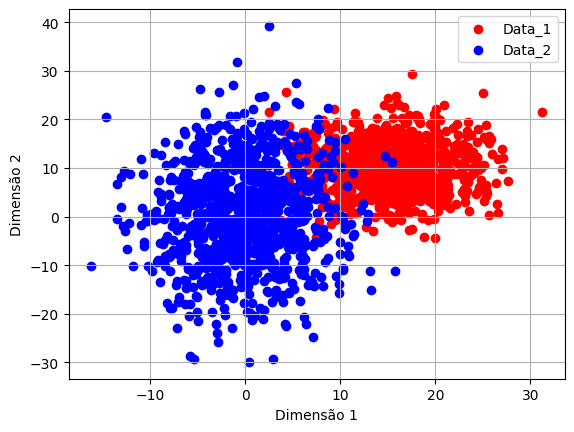

In [10]:
num_dados = 1000

data_1 = np.zeros((num_dados,2))
data_2 = np.zeros((num_dados,2))

for i in range(num_dados):
    a = np.random.normal(15, 5)
    b = np.random.normal(10, 5)

    c = np.random.normal(0, 5)
    d = np.random.normal(0, 10)

    data_1[i] = [a,b]
    data_2[i] = [c,d]

plot_dados(data_1, data_2)

In [11]:
from scipy.stats import shapiro

stat_data_1, p_data_1 = shapiro(data_1)
stat_data_2, p_data_2 = shapiro(data_2)

print("Teste de Shapiro-Wilk para dados data_1:")
print(f"Estatística: {stat_data_1:.4f}, Valor-p: {p_data_1}")

if p_data_1 > 0.05:
    print("Os dados seguem uma distribuição normal (não rejeitamos H0).")
else:
    print("Os dados não seguem uma distribuição normal (rejeitamos H0).")

print("\nTeste de Shapiro-Wilk para dados data_2:")
print(f"Estatística: {stat_data_2:.4f}, Valor-p: {p_data_2}")

if p_data_2 > 0.05:
    print("Os dados seguem uma distribuição normal (não rejeitamos H0).")
else:
    print("Os dados não seguem uma distribuição normal (rejeitamos H0).")

Teste de Shapiro-Wilk para dados data_1:
Estatística: 0.9991, Valor-p: 0.4104220880475906
Os dados seguem uma distribuição normal (não rejeitamos H0).

Teste de Shapiro-Wilk para dados data_2:
Estatística: 0.9915, Valor-p: 1.9750466777937474e-09
Os dados não seguem uma distribuição normal (rejeitamos H0).


Realizando experimento com test_size igual a 20%:

Acurácia do LDA sob o conjunto de treinamento: 0.95
Acurácia do LDA sob o conjunto de teste: 0.93


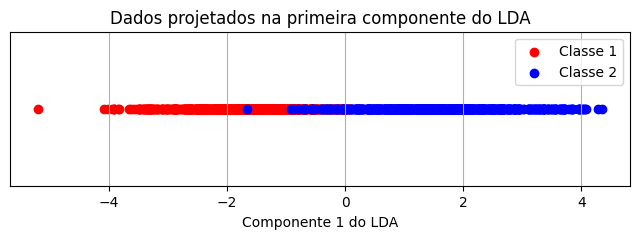

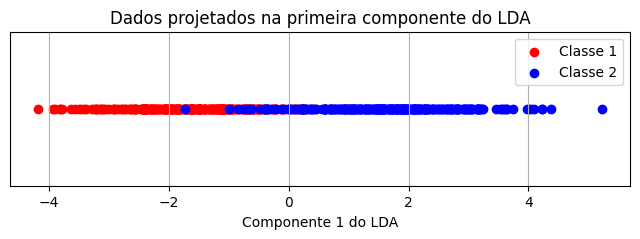

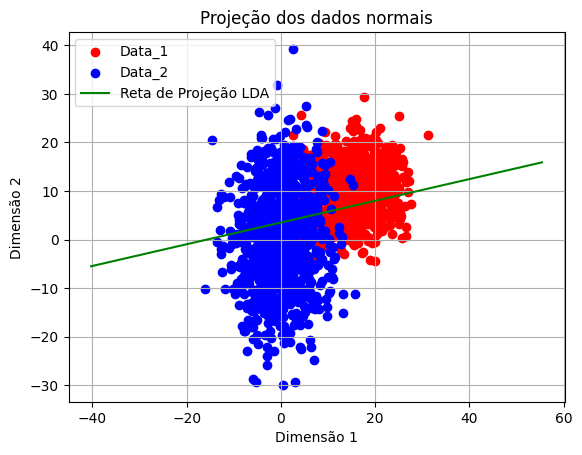

In [12]:
# divindo conjunto em treino e teste e fazendo treinamento do LDA
test_size = 0.3
data_train, data_test, label_train, label_test, data_normal, data_normal_label = preproces(data_1, data_2, num_dados, test_size)
lda = LDA(n_components=1)
data_train_lda = lda.fit(data_train, label_train).transform(data_train)
data_test_lda = lda.transform(data_test)

# calculando acurácia
lda_accuracy(data_train, data_test, label_train, label_test, lda)

# plotando dados projetados
plot_projection(data_train_lda, label_train)
plot_projection(data_test_lda, label_test)

#plotando reta de projeção no espaço original
projecao_lda = lda.coef_[0]
plot_reta(data_1, data_2, data_normal, projecao_lda)

# 2 - Fazendo teste com dados não normais

Gerando e plotando dados no espaço original:

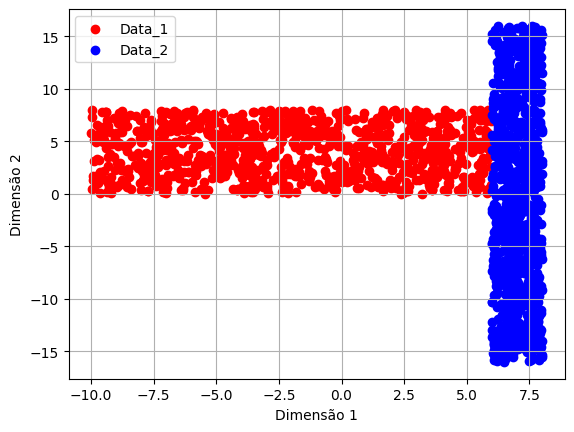

In [104]:
num_dados = 1000     

data_3 = np.zeros((num_dados,2))
data_4 = np.zeros((num_dados,2))

for i in range(num_dados):

    a = np.random.uniform(-10, 6)
    b = np.random.uniform(0, 8)

    c = np.random.uniform(6, 8)
    d = np.random.uniform(-16, 16)

    data_3[i] = [a,b]
    data_4[i] = [c,d]

# plotando dados
plot_dados(data_3, data_4)

In [108]:
from scipy.stats import shapiro

for i in range(data_3.shape[1]):
    estatistica, p = shapiro(data_3[:, i])
    print(f"Dimensão {i+1}: Estatística = {estatistica:.3f}, p = {p:.3f}")

for i in range(data_4.shape[1]):
    estatistica, p = shapiro(data_4[:, i])
    print(f"Dimensão {i+1}: Estatística = {estatistica:.3f}, p = {p:.3f}")



Dimensão 1: Estatística = 0.954, p = 0.000
Dimensão 2: Estatística = 0.954, p = 0.000
Dimensão 1: Estatística = 0.959, p = 0.000
Dimensão 2: Estatística = 0.954, p = 0.000


Realizando experimento com test_size igual a 10%:

Acurácia do LDA sob o conjunto de treinamento: 0.89
Acurácia do LDA sob o conjunto de teste: 0.88


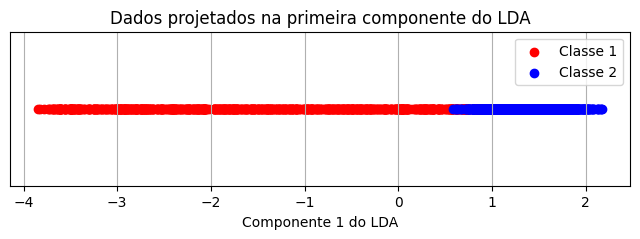

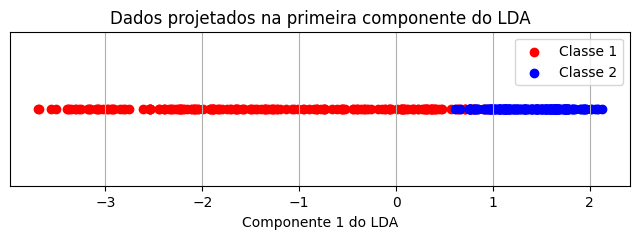

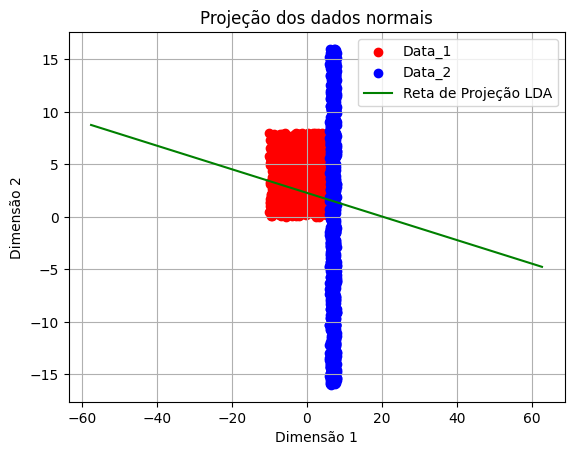

In [106]:
# divindo conjunto em treino e teste e fazendo treinamento do LDA
test_size = 0.2
data_train, data_test, label_train, label_test, data_qui, data_qui_label = preproces(data_3, data_4, num_dados, test_size)
lda2 = LDA(n_components=1)
data_train_lda2 = lda2.fit(data_train, label_train).transform(data_train)
data_test_lda2 = lda2.transform(data_test)

# calculando acurácia
lda_accuracy(data_train, data_test, label_train, label_test, lda2)

# plotando dados projetados
plot_projection(data_train_lda2, label_train)
plot_projection(data_test_lda2, label_test)

#plotando reta de projeção no espaço original
projecao_lda2 = lda2.coef_[0]
plot_reta(data_3, data_4, data_qui, projecao_lda2)

Experimento com test size igual a 90%

Acurácia do LDA sob o conjunto de treinamento: 0.91
Acurácia do LDA sob o conjunto de teste: 0.88


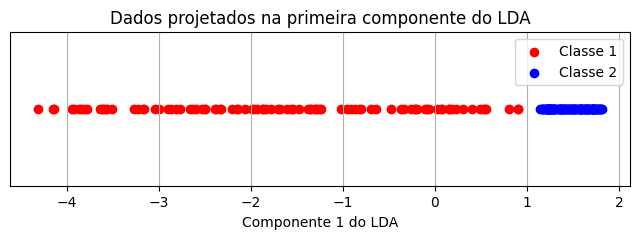

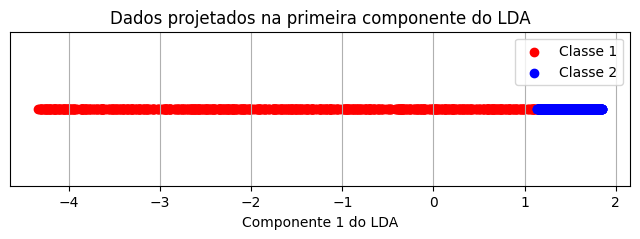

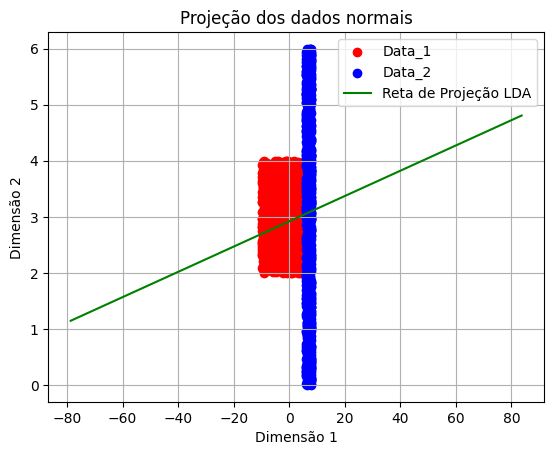

In [ ]:
# divindo conjunto em treino e teste e fazendo treinamento do LDA
test_size = 0.9
data_train, data_test, label_train, label_test, data_qui, data_qui_label = preproces(data_3, data_4, num_dados, test_size)
lda2 = LDA(n_components=1)
data_train_lda2 = lda2.fit(data_train, label_train).transform(data_train)
data_test_lda2 = lda2.transform(data_test)

# calculando acurácia
lda_accuracy(data_train, data_test, label_train, label_test, lda2)

# plotando dados projetados
plot_projection(data_train_lda2, label_train)
plot_projection(data_test_lda2, label_test)

#plotando reta de projeção no espaço original
projecao_lda2 = lda2.coef_[0]
plot_reta(data_3, data_4, data_qui, projecao_lda2)

# 3 - Aplicação com Database real

Baixando dataset breast_cancer e dividindo dados em treino e teste

In [111]:
breast_cancer = load_breast_cancer()
data = breast_cancer['data']
data_label = breast_cancer['target']
data_cancer_train, data_cancer_test, label_cancer_train, label_cancer_test = train_test_split(data, data_label, test_size=0.2, random_state=42, shuffle=True, stratify=data_label)

In [112]:
data.shape

(569, 30)

Visualizando o plot das duas primeiras dimensões dos dados

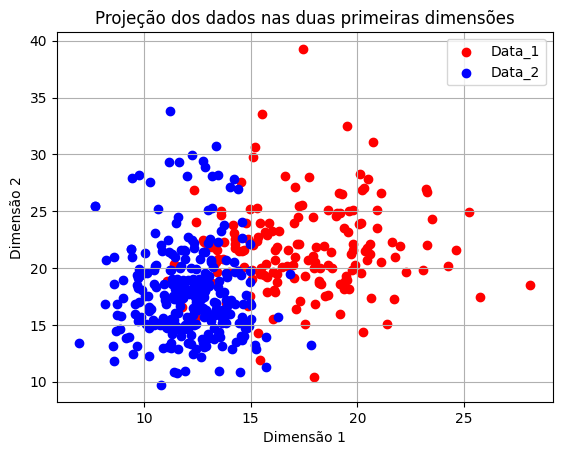

In [113]:
plt.title("Projeção dos dados nas duas primeiras dimensões")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")

class_0 = data_cancer_train[label_cancer_train == 0]
class_1 = data_cancer_train[label_cancer_train == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Data_1')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Data_2')

plt.grid(True)
plt.legend()

plt.show()

In [114]:
from scipy.stats import shapiro

cont1 = 0
for i in range(class_0.shape[1]):
    estatistica, p = shapiro(class_0[:, i])
    if p < 0.05:
        cont1 = cont1 + 1
print(f"{cont1} dimensões não são normais.")

cont2 = 0
for i in range(class_1.shape[1]):
    estatistica, p = shapiro(class_1[:, i])
    if p < 0.05:
        cont2 = cont2 + 1
print(f"{cont2} dimensões não são normais.")

28 dimensões não são normais.
24 dimensões não são normais.


Aplicando o LDA e observando a acurácia

In [19]:
lda3 = LDA(n_components=1)
data_cancer_train_lda = lda3.fit_transform(data_cancer_train, label_cancer_train)
data_cancer_test_lda = lda3.transform(data_cancer_test)
lda_accuracy(data_cancer_train, data_cancer_test, label_cancer_train, label_cancer_test, lda3)

Acurácia do LDA sob o conjunto de treinamento: 0.97
Acurácia do LDA sob o conjunto de teste: 0.96


Visualizando dados projetados

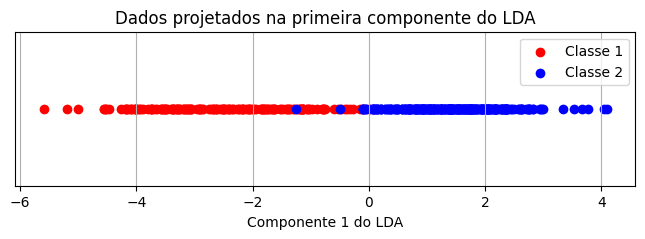

In [ ]:
plt.figure(figsize=(8, 2))
plt.scatter(data_cancer_train_lda[label_cancer_train == 0].ravel(), np.zeros(len(data_cancer_train_lda[label_cancer_train == 0])), color='red', label='Classe 1')
plt.scatter(data_cancer_train_lda[label_cancer_train == 1].ravel(), np.zeros(len(data_cancer_train_lda[label_cancer_train == 1])), color='blue', label='Classe 2')

plt.title("Dados projetados na primeira componente do LDA")
plt.xlabel("Componente 1 do LDA")
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()